In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
rutas = pd.read_csv('../baseDatos/rutas_turisticas.csv')

In [ ]:
transporte = pd.read_csv('../baseDatos/uso_transporte.csv')

In [3]:
ocupacion = pd.read_csv('../baseDatos/ocupacion_hotelera.csv')

In [ ]:
opiniones = pd.read_csv('../baseDatos/opiniones_turisticas.csv')

In [13]:
sostenibilidad = pd.read_csv('../baseDatos/datos_sostenibilidad.csv')

### Dataset con la puntuación media de los 166 servicios de GreenLake.

In [12]:
# Agrupar opiniones por nombre_servicio y calcular la media de las puntuaciones
conteo_servicios = opiniones['nombre_servicio'].value_counts().to_dict()
opiniones_agrupadas = opiniones.groupby(['nombre_servicio', 'tipo_servicio']).agg({'puntuacion': 'mean'}).reset_index()
opiniones_agrupadas['Num_opiniones'] = opiniones['nombre_servicio'].map(conteo_servicios)

# Renombrar la columna de puntuacion a media_puntuacion
opiniones_agrupadas.rename(columns={'puntuacion': 'media_puntuacion'}, inplace=True)

opiniones_agrupadas['descripcion_servicio'] = opiniones_agrupadas.apply(
    lambda row: row['tipo_servicio'] if row['tipo_servicio'] in ['Hotel', 'Ruta'] else row['nombre_servicio'].split()[-1],
    axis=1
)
opiniones_agrupadas['descripcion_servicio'] = opiniones_agrupadas['descripcion_servicio'].replace('Guiado', 'Tour Guiado')

In [19]:
opiniones = pd.read_csv('../datos/opiniones_turisticas.csv')
opiniones = opiniones[opiniones['tipo_servicio'] == 'Hotel']
num_opiniones = opiniones['nombre_servicio'].value_counts().to_dict()
print(num_opiniones)
opiniones_hoteles = opiniones.groupby(['nombre_servicio']).agg({'puntuacion': 'mean'}).reset_index()
opiniones_hoteles['Num_opiniones'] = opiniones_hoteles['nombre_servicio'].map(num_opiniones)


{'Simplivity Golden Plaza Hotel': 152, 'Apollo Towers': 152, 'Alletra Boutique Hotel': 145, 'Pointnext Signature Residences & Suites': 143, 'Synergy Golden Grand Hotel': 141, 'Alletra Haven': 140, 'Cray Villas': 140, 'Ezmeral Grand Hotel': 138, 'dHCI Platinum Beach Resort': 136, 'Primera Grand': 135, 'ProLiant Towers': 134, 'InfoSight Boutique Hotel': 133, 'Aruba Lodge': 132, 'Apollo Executive Beach Resort': 132, 'Aruba Luxury Lodge': 128, 'Apollo Diamond Suites': 127, 'ProLiant Haven': 127, 'Nimble Inn': 125, 'Alletra Resort': 124, 'GreenLake Digital Business Suites': 123, 'GreenLake Platinum Heritage Inn': 121, 'ProLiant Place': 118, 'Alletra Diamond Grand Hotel': 111, 'dHCI Executive Boutique Hotel': 107, 'Apollo Resort & Spa': 84}


## Ocupación hoteles

/var/folders/k2/p_2k6jgx3836yjfwy9gj_mgc0000gn/T/ipykernel_27125/907585400.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prolliant_data['fecha'] = pd.to_datetime(prolliant_data['fecha'])


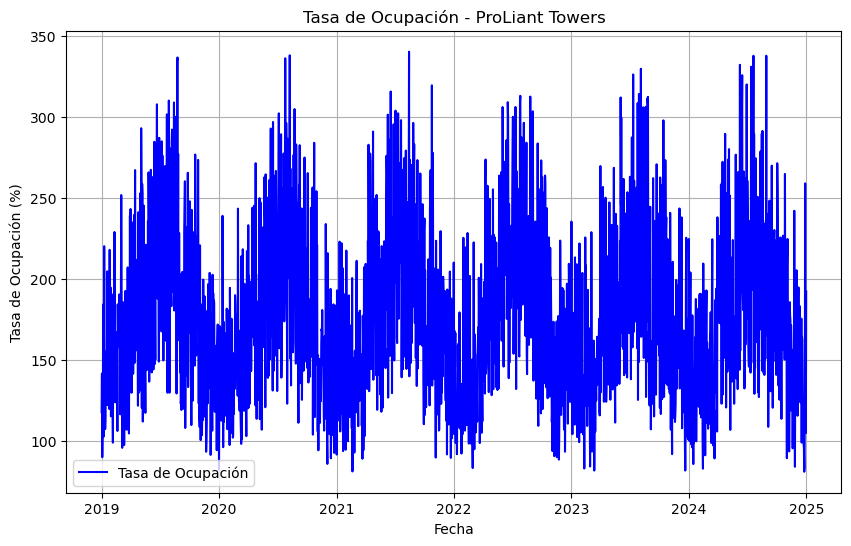

In [7]:
import matplotlib.pyplot as plt

# Filtrar los datos del hotel "ProLiant Towers"
prolliant_data = ocupacion[ocupacion['hotel_nombre'] == 'Aruba Luxury Lodge']

# Convertir la columna 'fecha' a formato datetime para una mejor representación
prolliant_data['fecha'] = pd.to_datetime(prolliant_data['fecha'])

# Representar la tasa de ocupación en función de la fecha
plt.figure(figsize=(10, 6))
plt.plot(prolliant_data['fecha'], prolliant_data['precio_promedio_noche'], label='Tasa de Ocupación', color='blue')
plt.title('Tasa de Ocupación - ProLiant Towers')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Ocupación (%)')
plt.legend()
plt.grid()
plt.show()

In [8]:
num_hoteles_distintos = ocupacion['hotel_nombre'].nunique()
print(f"Número de hoteles distintos: {num_hoteles_distintos}")

Número de hoteles distintos: 25


In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

# Asegurarse de que la columna 'fecha' esté en formato datetime
ocupacion['fecha'] = pd.to_datetime(ocupacion['fecha'])
# Crear las nuevas columnas
ocupacion['dia_semana'] = ocupacion['fecha'].dt.weekday  # Día de la semana (0=Lunes, 6=Domingo)
ocupacion['mes'] = ocupacion['fecha'].dt.month  # Mes
ocupacion['semana'] = ocupacion['fecha'].dt.isocalendar().week  # Semana del año

# Crear un DataFrame para almacenar las predicciones
predicciones = pd.DataFrame()

# Iterar sobre cada hotel
#for hotel in ocupacion['hotel_nombre'].unique():
hotel = 'Aruba Luxury Lodge'
if True:
    # Filtrar los datos del hotel
    hotel_data = ocupacion[ocupacion['hotel_nombre'] == hotel]
    
    # Agrupar por fecha y calcular la ocupación promedio diaria
    hotel_data = hotel_data.groupby('fecha')['tasa_ocupacion'].mean()
    
    # Crear un índice de fecha completo para manejar fechas faltantes
    hotel_data = hotel_data.asfreq('D').fillna(method='ffill')
    
    # Descomponer la serie temporal para capturar el patrón estacional
    decomposition = seasonal_decompose(hotel_data, model='additive', period=365)
    estacionalidad = decomposition.seasonal
    
    # Predecir la ocupación para el año 2026
    fechas_prediccion = pd.date_range(start='2025-01-01', end='2025-12-31', freq='D')
    prediccion = estacionalidad[:len(fechas_prediccion)].values + hotel_data.mean()
    
    # Almacenar las predicciones
    predicciones = pd.concat([predicciones, pd.DataFrame({
        'hotel_nombre': hotel,
        'fecha': fechas_prediccion,
        'tasa_ocupacion_predicha': prediccion
    })])

# Mostrar las primeras filas de las predicciones
print(predicciones.head())

         hotel_nombre      fecha  tasa_ocupacion_predicha
0  Aruba Luxury Lodge 2025-01-01                43.298420
1  Aruba Luxury Lodge 2025-01-02                51.108283
2  Aruba Luxury Lodge 2025-01-03                52.108283
3  Aruba Luxury Lodge 2025-01-04                44.711571
4  Aruba Luxury Lodge 2025-01-05                41.315407


/var/folders/k2/p_2k6jgx3836yjfwy9gj_mgc0000gn/T/ipykernel_27125/2174949195.py:25: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hotel_data = hotel_data.asfreq('D').fillna(method='ffill')


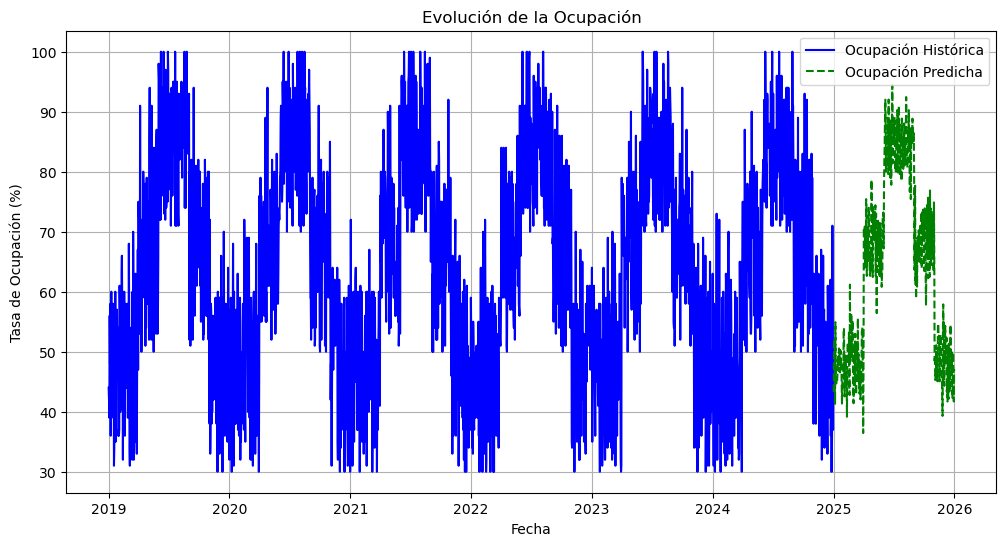

In [16]:
# Concatenar los datos históricos de ocupación con las predicciones
ocupacion_historica = prolliant_data[['fecha', 'tasa_ocupacion']].rename(columns={'tasa_ocupacion': 'tasa_ocupacion_historica'})
ocupacion_predicha = predicciones[['fecha', 'tasa_ocupacion_predicha']]

# Unir ambos DataFrames
ocupacion_completa = pd.concat([ocupacion_historica.set_index('fecha'), ocupacion_predicha.set_index('fecha')]).reset_index()

# Graficar la evolución de la ocupación
plt.figure(figsize=(12, 6))
plt.plot(ocupacion_completa['fecha'], ocupacion_completa['tasa_ocupacion_historica'], label='Ocupación Histórica', color='blue')
plt.plot(ocupacion_completa['fecha'], ocupacion_completa['tasa_ocupacion_predicha'], label='Ocupación Predicha', color='green', linestyle='--')
plt.title('Evolución de la Ocupación')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Ocupación (%)')
plt.legend()
plt.grid()
plt.show()

## Sostenibilidad

In [45]:
sostenibilidad = pd.read_csv('../baseDatos/datos_sostenibilidad.csv')
# Convertir la columna 'fecha' a formato datetime, eliminando filas con errores de formato
sostenibilidad['fecha'] = pd.to_datetime(sostenibilidad['fecha'], errors='coerce')

# Eliminar filas donde la conversión a datetime haya resultado en NaT
sostenibilidad = sostenibilidad.dropna(subset=['fecha'])

In [46]:
# Crear nuevas columnas para año, mes, semana y día de la semana
sostenibilidad['año'] = sostenibilidad['fecha'].dt.year
sostenibilidad['mes'] = sostenibilidad['fecha'].dt.month
sostenibilidad['semana'] = sostenibilidad['fecha'].dt.isocalendar().week
sostenibilidad['dia_semana'] = sostenibilidad['fecha'].dt.weekday

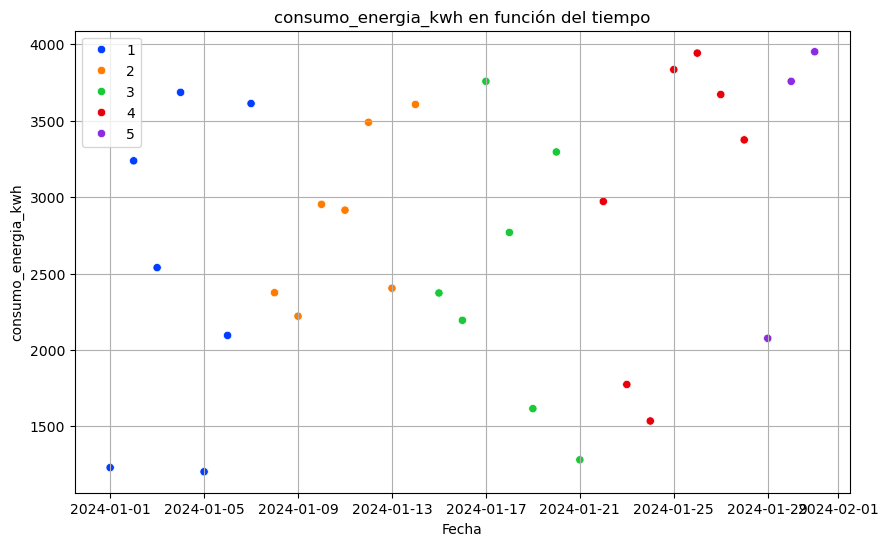

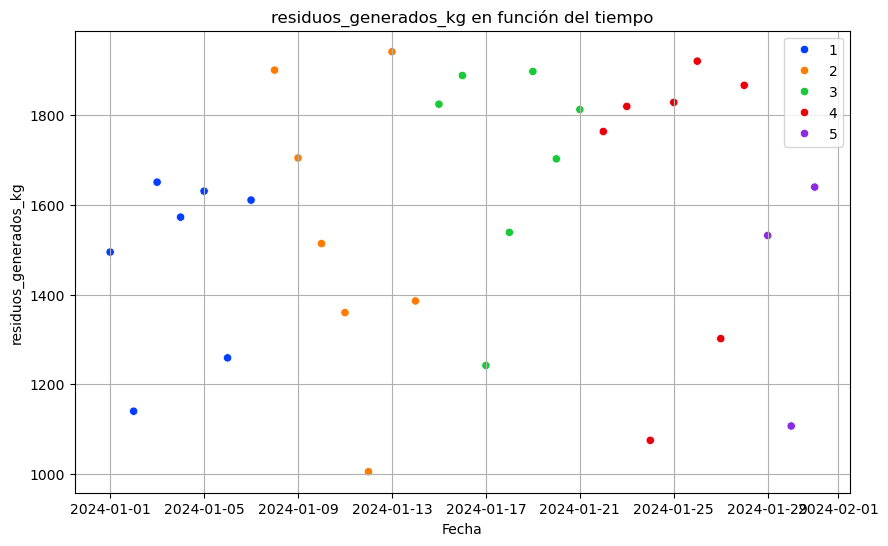

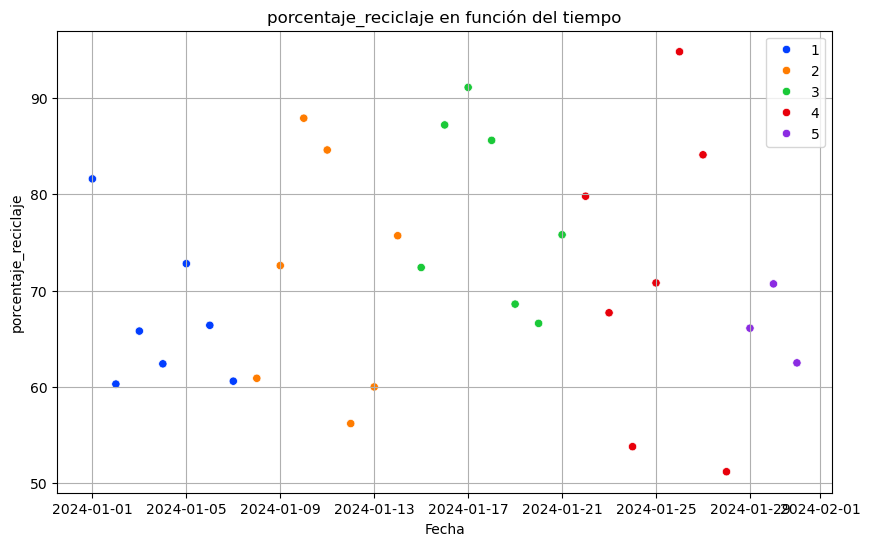

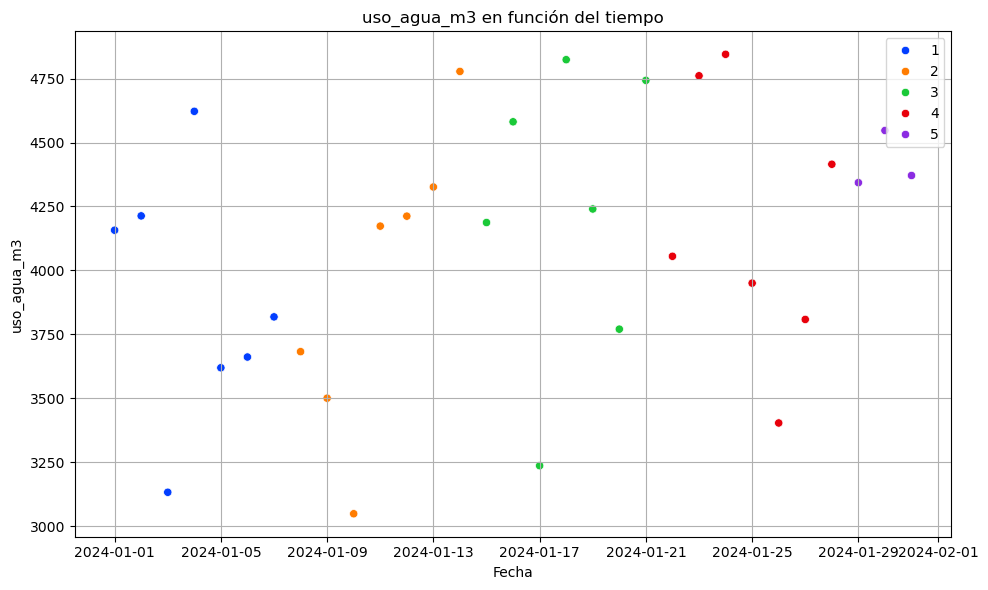

In [ ]:

# Filtrar los datos para un hotel concreto, por ejemplo, "Aruba Luxury Lodge"
hotel_nombre = "Aruba Luxury Lodge"
hotel_sostenibilidad = sostenibilidad[sostenibilidad['hotel_nombre'] == hotel_nombre]

# Filtrar los datos para los años 2023 y 2024
hotel_sostenibilidad = hotel_sostenibilidad[hotel_sostenibilidad['año'] == 2024]
hotel_sostenibilidad = hotel_sostenibilidad[hotel_sostenibilidad['mes'] == 1]

# Graficar cada columna numérica en función del tiempo
columnas_numericas = ['consumo_energia_kwh', 'residuos_generados_kg', 'porcentaje_reciclaje', 'uso_agua_m3']

for i, columna in enumerate(columnas_numericas, 1):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(hotel_sostenibilidad, x ='fecha', y = columna, hue = 'dia_semana', palette='bright')
    plt.title(f'{columna} en función del tiempo')
    plt.xlabel('Fecha')
    plt.ylabel(columna)
    plt.grid()
    plt.legend()

plt.tight_layout()
plt.show()

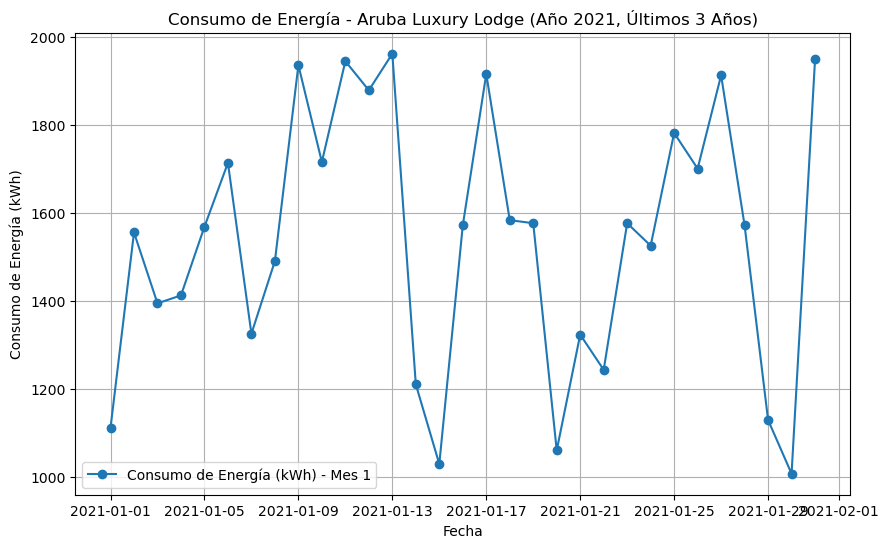

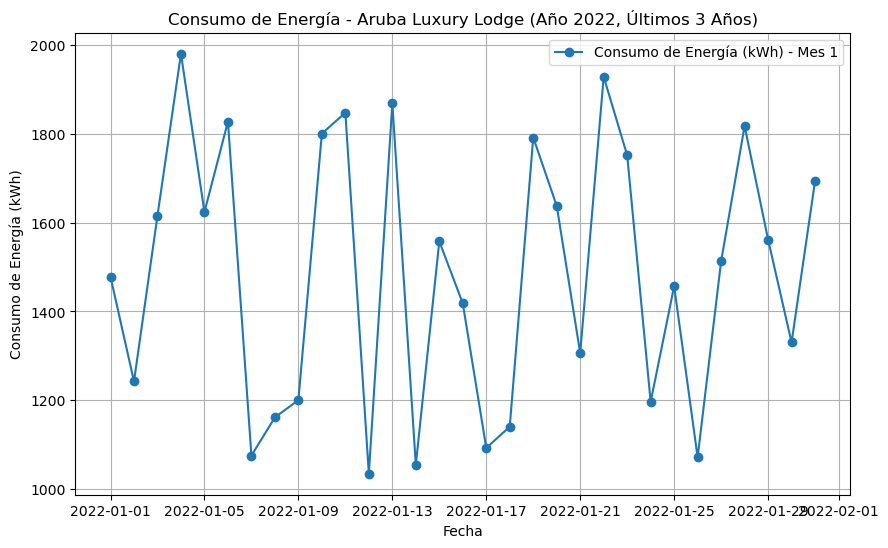

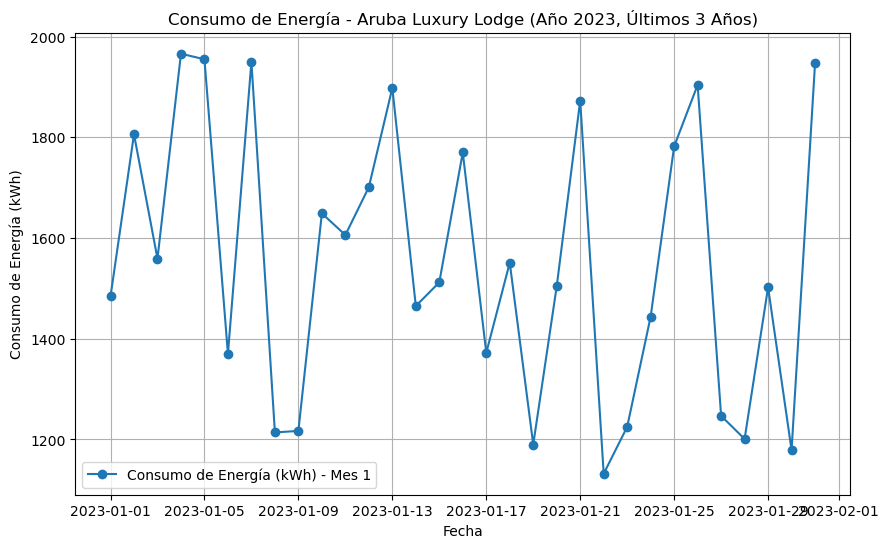

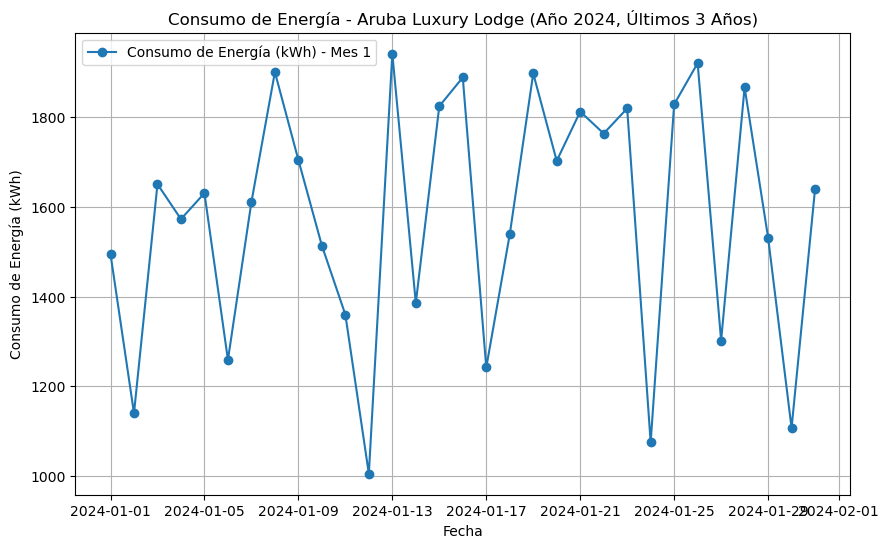

In [51]:

hotel_nombre = "Aruba Luxury Lodge"
anio_actual = 2024
datos_filtrados = sostenibilidad[
    (sostenibilidad['hotel_nombre'] == hotel_nombre) &
    (sostenibilidad['mes'] == 1) &
    (sostenibilidad['año'] >= anio_actual - 3)
]

# Crear una lista de meses únicos en los datos filtrados
años_unicos = datos_filtrados['año'].unique()

# Iterar sobre cada mes y graficar los datos correspondientes
for año in años_unicos:
    datos_mes = datos_filtrados[datos_filtrados['año'] == año]
    plt.figure(figsize=(10, 6))
    plt.plot(datos_mes['fecha'], datos_mes['residuos_generados_kg'], marker='o', label=f'Consumo de Energía (kWh) - Mes {mes}')
    plt.title(f'Consumo de Energía - {hotel_nombre} (Año {año}, Últimos 3 Años)')
    plt.xlabel('Fecha')
    plt.ylabel('Consumo de Energía (kWh)')
    plt.grid()
    plt.legend()
    plt.show()


In [65]:
import pandas as pd
import re

# Cargar los datos
sostenibilidad_df = pd.read_csv('../baseDatos/datos_sostenibilidad.csv')
ocupacion_df = pd.read_csv("../baseDatos/ocupacion_hotelera.csv")

sostenibilidad_df["fecha"] = sostenibilidad_df["fecha"].astype(str).apply(lambda x: re.sub(r"[^\d\-]", "", x))

# Convertir a datetime después de limpiar
sostenibilidad_df["fecha"] = pd.to_datetime(sostenibilidad_df["fecha"], errors='coerce')
ocupacion_df["fecha"] = pd.to_datetime(ocupacion_df["fecha"], errors='coerce')

print("Tipo de fecha en sostenibilidad:", sostenibilidad_df["fecha"].dtype)
print("Tipo de fecha en ocupación:", ocupacion_df["fecha"].dtype)

# Unir los datasets por hotel_nombre y fecha
df_completo = pd.merge(sostenibilidad_df, ocupacion_df, on=["hotel_nombre", "fecha"], how="inner")

# Ver las primeras filas del DataFrame combinado
print(df_completo.head())
# Guardar el DataFrame combinado en un nuevo archivo CSV
df_completo.to_csv("../baseDatos/sostenibilidad_ocupacion.csv", index=False)


Tipo de fecha en sostenibilidad: datetime64[ns]
Tipo de fecha en ocupación: datetime64[ns]
                  hotel_nombre  consumo_energia_kwh  residuos_generados_kg  \
0  Alletra Diamond Grand Hotel                 3077                   1821   
1              ProLiant Towers                 2253                   1319   
2           Aruba Luxury Lodge                 3824                   1672   
3     InfoSight Boutique Hotel                 1701                   1070   
4                Primera Grand                 2970                   1547   

   porcentaje_reciclaje  uso_agua_m3      fecha  tasa_ocupacion  \
0                  73.5         4977 2019-01-01              44   
1                  71.5         3145 2019-01-01              54   
2                  89.7         4179 2019-01-01              44   
3                  82.7         4911 2019-01-01              40   
4                  94.6         3907 2019-01-01              42   

   reservas_confirmadas  cancelacione

In [60]:
from sklearn.preprocessing import MinMaxScaler

df = df_completo.copy()
# Calcular ocupación real
df["ocupacion_real"] = df["reservas_confirmadas"] - df["cancelaciones"]
df["ocupacion_real"] = df["ocupacion_real"].replace(0, 1)  # evitar división por cero

# Calcular sostenibilidad relativa por huésped
df["energia_por_persona"] = df["consumo_energia_kwh"] / df["ocupacion_real"]
df["residuos_por_persona"] = df["residuos_generados_kg"] / df["ocupacion_real"]
df["agua_por_persona"] = df["uso_agua_m3"] / df["ocupacion_real"]
df["reciclaje_invertido"] = 100 - df["porcentaje_reciclaje"]

# Variables a normalizar (todas en dirección ↓ = peor)
vars_para_score = ["energia_por_persona", "residuos_por_persona", "agua_por_persona", "reciclaje_invertido"]

# Normalización
scaler = MinMaxScaler()
df[vars_para_score] = scaler.fit_transform(df[vars_para_score])

# Score (más alto = más sostenible)
df["sostenibilidad_score"] = 1 - df[vars_para_score].mean(axis=1)


In [61]:
# Agrupar por 'hotel_nombre' y calcular la media de 'sostenibilidad_score'
media_sostenibilidad = df.groupby('hotel_nombre')['sostenibilidad_score'].mean().reset_index()

# Renombrar la columna para mayor claridad
media_sostenibilidad.rename(columns={'sostenibilidad_score': 'media_sostenibilidad_score'}, inplace=True)

print(media_sostenibilidad)

                               hotel_nombre  media_sostenibilidad_score
0                    Alletra Boutique Hotel                    0.740294
1               Alletra Diamond Grand Hotel                    0.740899
2                             Alletra Haven                    0.741508
3                            Alletra Resort                    0.735107
4                     Apollo Diamond Suites                    0.739370
5             Apollo Executive Beach Resort                    0.739305
6                       Apollo Resort & Spa                    0.738954
7                             Apollo Towers                    0.739465
8                               Aruba Lodge                    0.739177
9                        Aruba Luxury Lodge                    0.738236
10                              Cray Villas                    0.738076
11                      Ezmeral Grand Hotel                    0.736429
12        GreenLake Digital Business Suites                    0

In [64]:
def obtener_resumen_mensual(df, hotel, mes, año):
    # Asegurarse que 'mes' sea de dos dígitos
    mes_str = str(mes).zfill(2)
    periodo = f"{año}-{mes_str}"

    # Filtrar por hotel y periodo
    df["mes"] = df["fecha"].dt.to_period("M").astype(str)
    filtro = (df["hotel_nombre"] == hotel) & (df["mes"] == periodo)
    datos = df.loc[filtro]

    if datos.empty:
        return f"No hay datos para {hotel} en {periodo}"

    # Calcular promedios
    score = datos["sostenibilidad_score"].mean() * 10
    energia = datos["consumo_energia_kwh"].sum()
    residuos = datos["residuos_generados_kg"].sum()
    agua = datos["uso_agua_m3"].sum()
    reciclaje = datos["porcentaje_reciclaje"].mean()

    resumen = {
        "Hotel": hotel,
        "Periodo": periodo,
        "Score de Sostenibilidad": round(score, 2),
        "Energia mensual (kwh)": round(energia, 2),
        "Residuos mensuales (kg)": round(residuos, 2),
        "Uso de Agua mensual (m3)": round(agua, 2),
        "Porcentaje medio de Reciclaje": round(reciclaje, 2)
    }
    
    return resumen

# Ejemplo de uso
hotel = "Aruba Luxury Lodge"
mes = 1
año = 2024
print(obtener_resumen_mensual(df, hotel, mes, año))


{'Hotel': 'Aruba Luxury Lodge', 'Periodo': '2024-01', 'Score de Sostenibilidad': 6.68, 'Energia mensual (kwh)': 85748, 'Residuos mensuales (kg)': 48939, 'Uso de Agua mensual (m3)': 127020, 'Porcentaje medio de Reciclaje': 71.5}
